In [ ]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.layers import Input, Lambda, Dense, Flatten,Conv2D,MaxPooling2D,Dropout,Flatten
from keras.models import Model,Sequential
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,img_to_array,array_to_img
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
from os import listdir,mkdir
import shutil

In [ ]:
import os
import cv2
import random
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.use("Agg")

import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Flatten)
from tensorflow.keras.layers import (Dense, Lambda, Dropout, Activation)

from tensorflow.keras.layers import (Conv2D, MaxPooling2D)
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('styles_best.csv')
df = df.drop(['Unnamed: 0'],axis = 1)
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,image_path
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,/content/myntradataset/images/15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,/content/myntradataset/images/39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,/content/myntradataset/images/59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,/content/myntradataset/images/21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,/content/myntradataset/images/53759.jpg


In [ ]:
df.isna().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
image                   0
image_path              0
dtype: int64

In [ ]:
df = df.dropna()
df.index = np.arange(0,len(df))
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,image_path
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,/content/myntradataset/images/15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,/content/myntradataset/images/39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,/content/myntradataset/images/59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,/content/myntradataset/images/21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,/content/myntradataset/images/53759.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...
44094,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,17036.jpg,/content/myntradataset/images/17036.jpg
44095,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,6461.jpg,/content/myntradataset/images/6461.jpg
44096,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,18842.jpg,/content/myntradataset/images/18842.jpg
44097,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume,46694.jpg,/content/myntradataset/images/46694.jpg


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d paramaggarwal/fashion-product-images-small

 98% 556M/565M [00:07<00:00, 81.3MB/s]
100% 565M/565M [00:07<00:00, 74.5MB/s]


In [ ]:
!unzip fashion-product-images-small.zip

Streaming output truncated to the last 5000 lines.
  inflating: myntradataset/images/5813.jpg  
  inflating: myntradataset/images/58131.jpg  
  inflating: myntradataset/images/58132.jpg  
  inflating: myntradataset/images/58133.jpg  
  inflating: myntradataset/images/58135.jpg  
  inflating: myntradataset/images/58136.jpg  
  inflating: myntradataset/images/58137.jpg  
  inflating: myntradataset/images/58138.jpg  
  inflating: myntradataset/images/58139.jpg  
  inflating: myntradataset/images/5814.jpg  
  inflating: myntradataset/images/58140.jpg  
  inflating: myntradataset/images/58141.jpg  
  inflating: myntradataset/images/58143.jpg  
  inflating: myntradataset/images/58144.jpg  
  inflating: myntradataset/images/58145.jpg  
  inflating: myntradataset/images/58146.jpg  
  inflating: myntradataset/images/58147.jpg  
  inflating: myntradataset/images/58148.jpg  
  inflating: myntradataset/images/58149.jpg  
  inflating: myntradataset/images/5815.jpg  
  inflating: myntradataset/image

In [ ]:
df['subcat_count'] = df.groupby(['masterCategory', 'subCategory'])['id'].transform('count')
print(df.shape)
df

(44099, 16)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,image_path,subcat_count,articleType_count,gender_masterCategory,gender_masterCategory_count
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,/content/myntradataset/images/15970.jpg,15390,3214,MenApparel,11344
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,/content/myntradataset/images/39386.jpg,2686,603,MenApparel,11344
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,/content/myntradataset/images/59263.jpg,2542,2542,WomenAccessories,5319
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,/content/myntradataset/images/21379.jpg,2686,304,MenApparel,11344
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,/content/myntradataset/images/53759.jpg,15390,7068,MenApparel,11344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44094,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,17036.jpg,/content/myntradataset/images/17036.jpg,7324,2846,MenFootwear,5742
44095,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,6461.jpg,/content/myntradataset/images/6461.jpg,915,915,MenFootwear,5742
44096,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,18842.jpg,/content/myntradataset/images/18842.jpg,15390,7068,MenApparel,11344
44097,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume,46694.jpg,/content/myntradataset/images/46694.jpg,1002,598,WomenPersonal Care,1553


In [ ]:
subcategory_df = df[df['subcat_count']>=500]
subcategory_df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,image_path,subcat_count,articleType_count,gender_masterCategory,gender_masterCategory_count
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,/content/myntradataset/images/15970.jpg,15390,3214,MenApparel,11344
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,/content/myntradataset/images/39386.jpg,2686,603,MenApparel,11344
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,/content/myntradataset/images/59263.jpg,2542,2542,WomenAccessories,5319
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,/content/myntradataset/images/21379.jpg,2686,304,MenApparel,11344
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,/content/myntradataset/images/53759.jpg,15390,7068,MenApparel,11344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44094,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,17036.jpg,/content/myntradataset/images/17036.jpg,7324,2846,MenFootwear,5742
44095,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,6461.jpg,/content/myntradataset/images/6461.jpg,915,915,MenFootwear,5742
44096,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,18842.jpg,/content/myntradataset/images/18842.jpg,15390,7068,MenApparel,11344
44097,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume,46694.jpg,/content/myntradataset/images/46694.jpg,1002,598,WomenPersonal Care,1553


In [ ]:
subcategory_df.index = np.arange(0,len(subcategory_df))
subcategory_df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,image_path,subcat_count,articleType_count,gender_masterCategory,gender_masterCategory_count
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,/content/myntradataset/images/15970.jpg,15390,3214,MenApparel,11344
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,/content/myntradataset/images/39386.jpg,2686,603,MenApparel,11344
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,/content/myntradataset/images/59263.jpg,2542,2542,WomenAccessories,5319
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,/content/myntradataset/images/21379.jpg,2686,304,MenApparel,11344
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,/content/myntradataset/images/53759.jpg,15390,7068,MenApparel,11344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40249,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,17036.jpg,/content/myntradataset/images/17036.jpg,7324,2846,MenFootwear,5742
40250,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,6461.jpg,/content/myntradataset/images/6461.jpg,915,915,MenFootwear,5742
40251,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,18842.jpg,/content/myntradataset/images/18842.jpg,15390,7068,MenApparel,11344
40252,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume,46694.jpg,/content/myntradataset/images/46694.jpg,1002,598,WomenPersonal Care,1553


In [ ]:
subcategory_df.groupby(['subCategory']).count().iloc[:,:]
subcategory_df.groupby(['subCategory']).count().iloc[:,0]

subCategory
Bags           3053
Belts           811
Bottomwear     2686
Eyewear        1073
Flip Flops      915
Fragrance      1002
Innerwear      1806
Jewellery      1080
Sandal          961
Shoes          7324
Socks           686
Topwear       15390
Wallets         925
Watches        2542
Name: id, dtype: int64

In [ ]:
subcategory_df_train = subcategory_df.sample(frac=0.8, random_state=123)
subcategory_df_test = subcategory_df.drop(subcategory_df_train.index)

In [ ]:
df['articleType_count'] = df.groupby(['masterCategory', 'subCategory', 'articleType'])['id'].transform('count')

In [ ]:
articletype_df = df[df['articleType_count']>=500]
articletype_df.index = np.arange(0,len(articletype_df))
articletype_df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,image_path,subcat_count,articleType_count,gender_masterCategory,gender_masterCategory_count
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,/content/myntradataset/images/15970.jpg,15390,3214,MenApparel,11344
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,/content/myntradataset/images/39386.jpg,2686,603,MenApparel,11344
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,/content/myntradataset/images/59263.jpg,2542,2542,WomenAccessories,5319
3,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,/content/myntradataset/images/53759.jpg,15390,7068,MenApparel,11344
4,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg,/content/myntradataset/images/1855.jpg,15390,7068,MenApparel,11344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34651,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,17036.jpg,/content/myntradataset/images/17036.jpg,7324,2846,MenFootwear,5742
34652,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,6461.jpg,/content/myntradataset/images/6461.jpg,915,915,MenFootwear,5742
34653,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,18842.jpg,/content/myntradataset/images/18842.jpg,15390,7068,MenApparel,11344
34654,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume,46694.jpg,/content/myntradataset/images/46694.jpg,1002,598,WomenPersonal Care,1553


In [ ]:
articletype_df_train = articletype_df.sample(frac=0.8, random_state=123)
articletype_df_test = articletype_df.drop(articletype_df_train.index)

In [ ]:
df['gender_masterCategory'] = df['gender'] + df['masterCategory']
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,image_path,subcat_count,articleType_count,gender_masterCategory,gender_masterCategory_count
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,/content/myntradataset/images/15970.jpg,15390,3214,MenApparel,11344
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,/content/myntradataset/images/39386.jpg,2686,603,MenApparel,11344
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,/content/myntradataset/images/59263.jpg,2542,2542,WomenAccessories,5319
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,/content/myntradataset/images/21379.jpg,2686,304,MenApparel,11344
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,/content/myntradataset/images/53759.jpg,15390,7068,MenApparel,11344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44094,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,17036.jpg,/content/myntradataset/images/17036.jpg,7324,2846,MenFootwear,5742
44095,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,6461.jpg,/content/myntradataset/images/6461.jpg,915,915,MenFootwear,5742
44096,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,18842.jpg,/content/myntradataset/images/18842.jpg,15390,7068,MenApparel,11344
44097,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume,46694.jpg,/content/myntradataset/images/46694.jpg,1002,598,WomenPersonal Care,1553


In [ ]:
df['gender_masterCategory_count'] = df.groupby(['gender_masterCategory'])['id'].transform('count')
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,image_path,subcat_count,articleType_count,gender_masterCategory,gender_masterCategory_count
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg,/content/myntradataset/images/15970.jpg,15390,3214,MenApparel,11344
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg,/content/myntradataset/images/39386.jpg,2686,603,MenApparel,11344
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg,/content/myntradataset/images/59263.jpg,2542,2542,WomenAccessories,5319
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg,/content/myntradataset/images/21379.jpg,2686,304,MenApparel,11344
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg,/content/myntradataset/images/53759.jpg,15390,7068,MenApparel,11344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44094,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,17036.jpg,/content/myntradataset/images/17036.jpg,7324,2846,MenFootwear,5742
44095,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,6461.jpg,/content/myntradataset/images/6461.jpg,915,915,MenFootwear,5742
44096,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,18842.jpg,/content/myntradataset/images/18842.jpg,15390,7068,MenApparel,11344
44097,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume,46694.jpg,/content/myntradataset/images/46694.jpg,1002,598,WomenPersonal Care,1553


In [ ]:
gender_mastercategory_df = df[df['gender_masterCategory_count']>=500]
gender_mastercategory_df_train = gender_mastercategory_df.sample(frac=0.8, random_state=123)
gender_mastercategory_df_test = gender_mastercategory_df.drop(gender_mastercategory_df_train.index)

image name = 14131.jpg, image size = (80, 60, 3), image data type = uint8


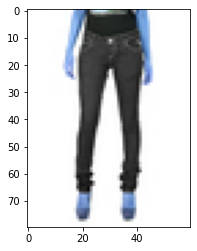

In [ ]:
%matplotlib inline
fname = random.choice([x for x in os.listdir('images')
               if os.path.isfile(os.path.join('images', x))])
image = cv2.imread('images/' + fname)
plt.imshow(image)
print('image name = {}, image size = {}, image data type = {}'.format(fname, image.shape, image.dtype))

In [ ]:
def data_augment(train_dataframe, test_dataframe, sel_y_col, num_samples):
  
    batch_size = 32
    image_width = image.shape[0]
    image_height = image.shape[1]

    image_generator_train = ImageDataGenerator(rescale=1./255,
                                              rotation_range=40,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              shear_range=0.2,
                                              zoom_range=0.2,
                                              horizontal_flip=True,
                                              fill_mode='nearest',
                                              validation_split = 0.2)

    image_generator_test = ImageDataGenerator(rescale=1./255)

    training_generator = image_generator_train.flow_from_dataframe(
        dataframe = train_dataframe,
        directory = '/content/images',
        x_col = 'image', 
        y_col = sel_y_col,
        target_size = (image_width,image_height),
        batch_size = batch_size, 
        shuffle = True,
        class_mode = 'categorical',
        subset = 'training'
        #seed = 123
    )

    validation_generator = image_generator_train.flow_from_dataframe(
        dataframe = train_dataframe, 
        directory = '/content/images',
        x_col = 'image',
        y_col = sel_y_col,
        target_size = (image_width,image_height),
        batch_size = batch_size,
        shuffle = True,
        class_mode = 'categorical',
        subset = 'validation'
        #seed=123
    )

    classes_train = len(training_generator.class_indices) 

    test_generator = image_generator_test.flow_from_dataframe(
        dataframe = test_dataframe,
        directory = '/content/images',
        x_col = 'image',
        y_col = sel_y_col,
        target_size = (image_width,image_height),
        batch_size = batch_size,
        shuffle = True,
        class_mode = 'categorical'
        #seed=123
    )

    n_classes = len(test_generator.class_indices)
    print('total number of subset samples', num_samples)
    print('total number of class', n_classes)

    return training_generator, validation_generator, test_generator, n_classes

In [ ]:
training_generator, validation_generator, test_generator, n_classes = data_augment(gender_mastercategory_df_train,
                                                                                   gender_mastercategory_df_test,
                                                                                   'gender_masterCategory', 
                                                                                   gender_mastercategory_df.shape[0])

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 4 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 27971 validated image filenames belonging to 12 classes.
Found 6992 validated image filenames belonging to 12 classes.
Found 8741 validated image filenames belonging to 12 classes.
total number of subset samples 43709
total number of class 12


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 4 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  .format(n_invalid, x_col)
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [ ]:
batch_size = 32
training_samples = len(training_generator.filenames)
validation_samples = len(validation_generator.filenames)
test_samples = len(test_generator.filenames)
total_steps = training_samples // batch_size
print(training_samples, validation_samples, test_samples, total_steps)

27971 6992 8741 874


In [ ]:
import keras
from keras.applications import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.layers import Dense, Dropout
# from keras.models import Model, load_model
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from keras import models
from keras import layers
from keras import optimizers

In [ ]:
batch_size = 32
image_width = image.shape[0]
image_height = image.shape[1]

vgg19 = VGG19(weights='imagenet', include_top=False, input_shape = (image_width, image_height, 3), pooling='max', classes = n_classes)
train_layers = 5 # train_layers = 5 for articleType test accuracy = 0.8514

for layer in vgg19.layers[:-1*train_layers]:
    layer.trainable = False

for layer in vgg19.layers:
    print(layer, layer.trainable)

80142336/80134624 [==============================] - 0s 0us/step
<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f42377301d0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f42373ddc50> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f42373cff98> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f4236b93630> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4236b96588> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4236b9b518> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f4236b9b3c8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4236ba4550> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4236b27908> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4236b30c50> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f4236b30cf8> Fals

In [ ]:
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.models import Model, Sequential
from tensorflow.keras import backend

# define transfer learning mdoel
# backend.clear_session() -- don't use this!!!

transfer_model = Sequential()
for layer in vgg19.layers:
    transfer_model.add(layer)
transfer_model.add(Dense(512, activation="relu")) 
transfer_model.add(Dropout(0.5))
transfer_model.add(Dense(n_classes, activation="softmax")) 

from keras import optimizers
adam = optimizers.Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-6)
#rmsprop = optimizers.RMSprop(lr=1e-3)

transfer_model.compile(loss="categorical_crossentropy",
                      optimizer=adam,
                      metrics=["accuracy"])
transfer_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 80, 60, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 80, 60, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 40, 30, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 40, 30, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 40, 30, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 20, 15, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 20, 15, 256)       2

In [ ]:
import time
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

save_model_name = 'vgg19_transfer_gendermastercat.h5'
# save_model_name = 'vgg19_transfer_articleType.h5'
# filepath = '/content/gdrive/My Drive/Colab Notebooks/BT5153_AML_Group_Project/'
filepath = '/content/'
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
best_model = ModelCheckpoint(filepath+save_model_name, save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, epsilon=1e-4, mode='min')

In [40]:
start = time.time()
vgg19_history = transfer_model.fit_generator(training_generator, steps_per_epoch=training_samples // batch_size,
                                            epochs=50,
                                            validation_data=validation_generator,
                                            validation_steps=validation_samples // batch_size, # class_weight = class_weights,
                                            callbacks=[earlyStopping, best_model, reduce_lr_loss]) 
elapsed = time.time() - start
print('Computation time = ' + str(round(elapsed,2)) + 's')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
874/874 [==============================] - 73s 75ms/step - loss: 1.6175 - accuracy: 0.4485 - val_loss: 0.7679 - val_accuracy: 0.7417

Epoch 00001: val_accuracy improved from -inf to 0.74169, saving model to /content/vgg19_transfer_gendermastercat.h5
Epoch 2/50
874/874 [==============================] - 65s 74ms/step - loss: 0.8311 - accuracy: 0.7152 - val_loss: 0.6428 - val_accuracy: 0.7780

Epoch 00002: val_accuracy improved from 0.74169 to 0.77795, saving model to /content/vgg19_transfer_gendermastercat.h5
Epoch 3/50
874/874 [==============================] - 65s 74ms/step - loss: 0.7139 - accuracy: 0.7545 - val_loss: 0.5911 - val_accuracy: 0.7924

Epoch 00003: val_accuracy improved from 0.77795 to 0.79243, saving model to /content/vgg19_transfer_gendermastercat.h5
Epoch 4/50
874/874 [==============================] - 65s 74ms/step - loss: 0.6544 - accuracy: 0.7740 - val_loss: 0.5614 - val_accuracy: 0.8042

Epoch 00004: val_accuracy improved from 0.79243 to 0.80419, saving

In [41]:
def plot_acc_loss(history):
    # plot train and valid loss history
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epoch_number = range(len(acc))
    plt.figure(figsize=(6, 6), dpi=100)
    plt.subplot(2,1,1)
    plt.plot(epoch_number, acc, 'r', label='train acc')
    plt.plot(epoch_number, val_acc, 'b', label='val acc')
    plt.title('Train and Validation Accuracy')
    plt.legend()

    plt.subplot(2,1,2)
    plt.plot(epoch_number, loss, 'r', label='train loss')
    plt.plot(epoch_number, val_loss, 'b', label='val loss')
    plt.title('Train and Validation Loss')
    plt.legend()

    plt.show()

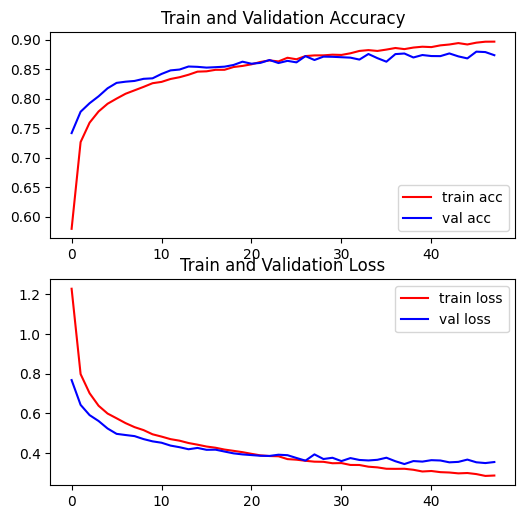

In [42]:
vgg19_valid_acc_plot = plot_acc_loss(vgg19_history)

In [43]:
transfer_model.evaluate(validation_generator)

219/219 [==============================] - 13s 59ms/step - loss: 0.3522 - accuracy: 0.8743


[0.3521766662597656, 0.8742849230766296]

In [44]:
transfer_model.evaluate(test_generator)

274/274 [==============================] - 7s 24ms/step - loss: 0.3190 - accuracy: 0.8904


[0.3190242052078247, 0.8904015421867371]